In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 9.0MB/s 
     |████████████████████████████████| 15.3MB 265kB/s 
     |████████████████████████████████| 6.5MB 29.3MB/s 


In [ ]:
import numpy as np
import pandas as pd

import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

from sklearn.preprocessing import normalize 
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')


In [ ]:
prec_data = pd.read_csv("precipitation_centers.csv")
prec_data.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,149,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,...,111,57,45,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77,133
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,...,347,141,28,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39,133
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,...,162,31,34,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55,133
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,...,105,79,86,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78,133


In [ ]:
world = gpd.read_file("cb_2018_us_county_500k.shp")
arkansas = world[world['STATEFP']=='05']
florida = world[world['STATEFP']=='12']

In [ ]:
map_data.iloc[:,7:-1]

,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,10_2012,11_2012,12_2012,01_2013,02_2013,03_2013,04_2013,...,09_2017,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020
0,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,137,46,74,137,119,116,210,...,53,149,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117
7,127,106,101,101,241,158,154,41,294,63,95,73,23,140,57,422,360,38,43,137,102,122,277,137,146,111,261,125,55,77,120,109,122,92,32,111,162,172,140,195,...,34,138,27,103,89,344,153,147,144,133,131,217,181,204,86,228,150,192,117,234,291,277,130,294,128,325,180,45,249,133,241,259,383,80,169,280,246,201,91,173
8,124,103,99,99,238,160,152,40,300,65,93,74,22,135,55,415,362,37,39,132,102,121,268,130,147,110,260,129,57,78,122,110,117,92,30,110,156,169,142,194,...,33,144,26,99,85,340,154,140,148,136,128,211,181,201,83,225,149,186,122,227,286,273,131,289,130,343,175,45,245,131,252,243,380,70,175,280,251,205,90,178
9,150,143,121,126,282,62,172,64,94,27,182,67,58,215,142,368,301,65,65,162,79,94,390,249,126,152,214,55,43,72,60,177,137,72,50,114,204,193,116,145,...,28,74,45,222,87,562,161,196,136,79,118,221,168,196,124,254,156,371,120,284,292,160,122,195,70,193,214,63,223,257,342,342,223,128,126,202,119,121,88,161
10,149,140,121,125,284,59,173,62,89,26,188,67,59,214,145,364,309,64,67,158,76,94,388,252,131,154,210,52,47,73,59,176,137,71,47,114,204,194,115,143,...,27,67,45,228,90,559,164,203,127,79,106,228,171,188,127,250,158,379,124,286,286,160,122,195,70,193,214,64,223,260,349,337,215,140,116,198,118,129,102,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,141,172,104,118,235,88,133,84,75,43,187,65,56,192,117,402,310,65,69,164,71,92,411,261,131,172,236,94,39,70,67,191,197,96,78,165,211,207,157,163,...,31,64,31,243,82,540,156,242,112,89,119,196,215,252,148,296,159,309,131,318,303,176,142,165,63,233,200,69,242,263,247,311,226,218,118,158,158,125,61,222
2201,108,81,125,95,257,149,180,37,320,47,106,45,20,148,86,465,342,46,43,135,127,94,277,113,95,89,221,117,59,72,69,121,130,122,42,84,149,138,124,195,...,39,145,37,83,78,319,173,111,174,96,150,194,127,149,89,182,155,153,122,205,295,289,126,240,145,315,184,44,235,118,262,252,339,90,192,190,166,256,95,133
2202,140,193,98,109,248,141,140,70,66,52,159,75,68,176,82,394,328,70,113,123,73,94,373,240,145,164,237,119,31,71,85,169,215,96,88,172,222,213,143,175,...,32,67,34,227,84,512,138,241,104,102,125,192,217,278,155,282,171,272,135,300,313,200,158,124,53,248,177,56,209,227,265,283,265,247,142,263,183,99,57,185
2203,144,165,108,126,243,91,145,83,98,38,167,69,51,210,112,408,313,72,70,158,79,94,411,247,137,158,238,88,35,62,64,175,186,94,71,146,226,201,149,155,...,31,70,32,218,83,534,151,223,110,95,107,203,204,260,136,282,153,316,116,312,317,180,121,202,64,226,218,61,228,234,247,352,251,193,125,161,160,103,79,212


No handles with labels found to put in legend.


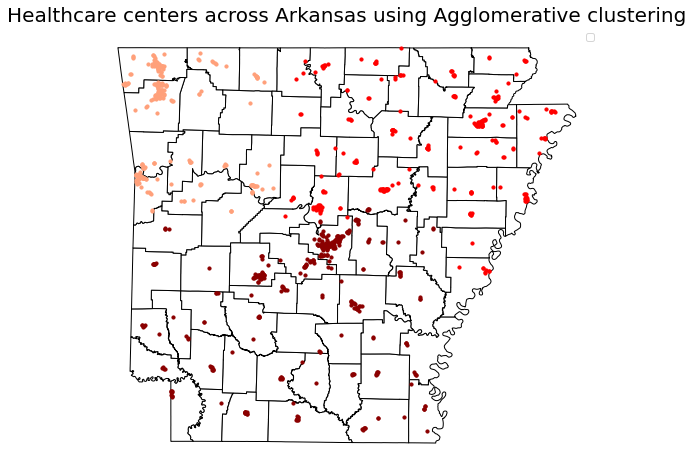

In [ ]:
map_data = prec_data[prec_data['STATE']=='AR'].copy()

agl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(normalize(map_data.iloc[:,7:-1]))
map_data['Cluster'] = agl.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = arkansas.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_ar = map_data
points = [Point(xy) for xy in zip(centers_ar["LONGITUDE"], centers_ar["LATITUDE"])]
centers_ar = gpd.GeoDataFrame(centers_ar, crs = {'init': 'epsg:4326'}, geometry = points)

centers_ar[centers_ar["Cluster"] == 0].plot(color = 'darkred', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 1].plot(color = 'lightsalmon', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 2].plot(color = 'red', ax = ax, markersize = 10)


plt.title("Healthcare centers across Arkansas using Agglomerative clustering", fontsize = 20)
ax.axis('off')
plt.legend()

In [ ]:
print(centers_ar[centers_ar['Cluster']==0].iloc[:,7:-3].mean(axis=1).mean())
print(centers_ar[centers_ar['Cluster']==1].iloc[:,7:-3].mean(axis=1).mean())
print(centers_ar[centers_ar['Cluster']==2].iloc[:,7:-3].mean(axis=1).mean())

164.28568429890845
153.34279542412077
159.46164772727266


No handles with labels found to put in legend.


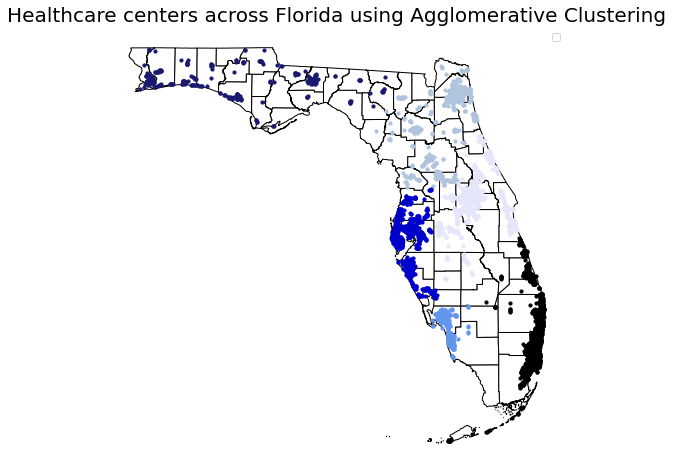

In [ ]:
map_data = prec_data[prec_data['STATE']=='FL'].copy()

agl = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(normalize(map_data.iloc[:,7:-1]))
map_data['Cluster'] = agl.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = florida.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_fl = map_data
points = [Point(xy) for xy in zip(centers_fl["LONGITUDE"], centers_fl["LATITUDE"])]
centers_fl = gpd.GeoDataFrame(centers_fl, crs = {'init': 'epsg:4326'}, geometry = points)

centers_fl[centers_fl["Cluster"] == 0].plot(color = 'black', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 1].plot(color = 'lightsteelblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 2].plot(color = 'midnightblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 3].plot(color = 'mediumblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 4].plot(color = 'lavender', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 5].plot(color = 'cornflowerblue', ax = ax, markersize = 10)


plt.title("Healthcare centers across Florida using Agglomerative Clustering", fontsize = 20)
ax.axis('off')
plt.legend()

In [ ]:
print(centers_fl[centers_fl['Cluster']==0].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==1].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==2].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==3].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==4].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==5].iloc[:,7:-3].mean(axis=1).mean())

177.38250613693097
156.97984329428007
175.85026605339107
168.06841531755862
154.55620506618263
162.70881108381116
